In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()






In [2]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [3]:

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [4]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/home/nexnt/projects/T809DATA_2021/env/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[1,  2000] loss: 2.210
[1,  4000] loss: 1.888
[1,  6000] loss: 1.707
[1,  8000] loss: 1.600


KeyboardInterrupt: 

In [ ]:
PATH = './06_neural_networks/cifar_net.pth'
torch.save(net.state_dict(), PATH)


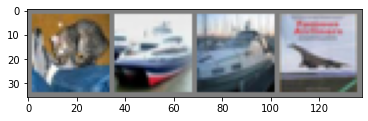

GroundTruth:    cat  ship  ship plane


In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
PATH = 'cifar_net.pth'

net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
outputs = net(images)

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [14]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

total_of_class = torch.Tensor()


cmt = torch.zeros(len(classes),len(classes), dtype=torch.int64)

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1
            cmt[label, prediction] = cmt[label, prediction] + 1

print(cmt)



# print accuracy for each class

print(correct_pred.items())
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))
    


tensor([[626,  30,  62,  25,  12,   7,  16,  15, 176,  31],
        [ 35, 771,  11,   9,   2,   2,  10,   7,  84,  69],
        [ 87,   9, 576,  97,  40,  54,  56,  28,  40,  13],
        [ 25,  15, 154, 424,  55, 160,  81,  24,  43,  19],
        [ 56,  11, 313, 110, 277,  42,  77,  79,  27,   8],
        [ 19,   8, 161, 259,  19, 414,  28,  60,  22,  10],
        [  1,  18, 135, 129,  26,  11, 638,  17,  17,   8],
        [ 28,  11,  80,  70,  53,  84,  14, 618,  10,  32],
        [123,  57,  18,  19,   6,   5,   5,   5, 737,  25],
        [ 49, 235,  25,  25,   9,   6,  18,  20,  98, 515]])
dict_items([('plane', 626), ('car', 771), ('bird', 576), ('cat', 424), ('deer', 277), ('dog', 414), ('frog', 638), ('horse', 618), ('ship', 737), ('truck', 515)])
Accuracy for class plane is: 62.6 %
Accuracy for class car   is: 77.1 %
Accuracy for class bird  is: 57.6 %
Accuracy for class cat   is: 42.4 %
Accuracy for class deer  is: 27.7 %
Accuracy for class dog   is: 41.4 %
Accuracy for class f

Confusion matrix, without normalization
tensor([[626,  30,  62,  25,  12,   7,  16,  15, 176,  31],
        [ 35, 771,  11,   9,   2,   2,  10,   7,  84,  69],
        [ 87,   9, 576,  97,  40,  54,  56,  28,  40,  13],
        [ 25,  15, 154, 424,  55, 160,  81,  24,  43,  19],
        [ 56,  11, 313, 110, 277,  42,  77,  79,  27,   8],
        [ 19,   8, 161, 259,  19, 414,  28,  60,  22,  10],
        [  1,  18, 135, 129,  26,  11, 638,  17,  17,   8],
        [ 28,  11,  80,  70,  53,  84,  14, 618,  10,  32],
        [123,  57,  18,  19,   6,   5,   5,   5, 737,  25],
        [ 49, 235,  25,  25,   9,   6,  18,  20,  98, 515]])


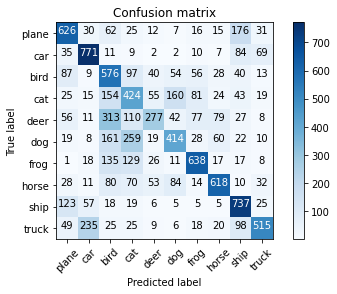

In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig("./cmt.png")

plot_confusion_matrix(cmt, classes)

In [ ]:
misclass = {classname: 0 for classname in classes}
for (label, tot_count), (classname, correct_count) in zip(total_pred.items(), correct_pred.items()):
    ...
    misclass[label] = (tot_count-correct_count)/tot_count
print()
plt.bar(misclass.keys(), misclass.values(), align='center', alpha=0.5)
plt.savefig("./06_neural_networks/1_1_1.png")
plt.title('Misclassification rate picture recognition')
plt.ylabel("Training iterations")

In [ ]:
len(classes)

In [23]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

Q = 3*a**3 - b**2

external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([36., 81.])
tensor([True, True])
